In [ ]:
#in this we are going to use LSTM(recurrent neural network) to predict stock market price
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/driver')

In [ ]:
df=pd.read_csv('/content/driver/My Drive/info1.csv')

In [ ]:
df.head()
df.shape

(242, 7)

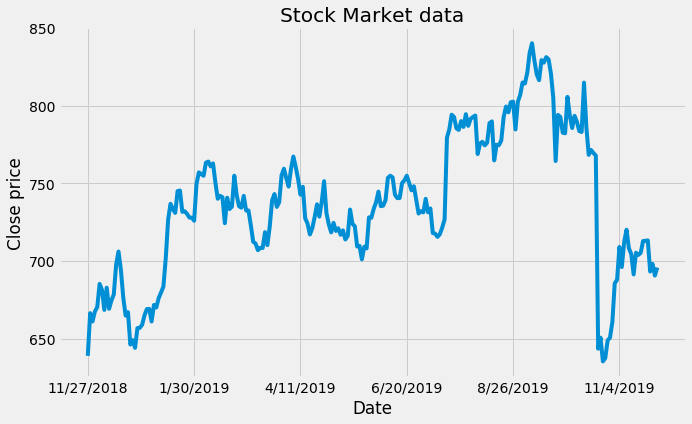

In [ ]:
#visualizing the data
plt.figure(figsize=(10,6))
plt.title("Stock Market data")
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(df)*0.8)
training_data_len

194

In [ ]:
#scale the data between the values 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01733398],
       [0.15161133],
       [0.12548828],
       [0.15673828],
       [0.17089844],
       [0.24365234],
       [0.22485352],
       [0.16186523],
       [0.23168945],
       [0.1652832 ],
       [0.19116211],
       [0.21069336],
       [0.3046875 ],
       [0.34521484],
       [0.28833008],
       [0.20141602],
       [0.14404297],
       [0.15478516],
       [0.05297852],
       [0.06665039],
       [0.04248047],
       [0.10473633],
       [0.10546875],
       [0.11523438],
       [0.14501953],
       [0.16455078],
       [0.16503906],
       [0.12548828],
       [0.17749023],
       [0.16943359],
       [0.19897461],
       [0.21655273],
       [0.23510742],
       [0.32495117],
       [0.44555664],
       [0.49536133],
       [0.47851563],
       [0.46679688],
       [0.53540039],
       [0.53710938],
       [0.47021484],
       [0.47192383],
       [0.46386719],
       [0.45214844],
       [0.4519043 ],
       [0.44213867],
       [0.55761719],
       [0.594

In [ ]:
train_data=scaled_data[0:training_data_len,:]
len(train_data)

194

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)



len(x_train)   
len(y_train)

[array([0.01733398, 0.15161133, 0.12548828, 0.15673828, 0.17089844,
       0.24365234, 0.22485352, 0.16186523, 0.23168945, 0.1652832 ,
       0.19116211, 0.21069336, 0.3046875 , 0.34521484, 0.28833008,
       0.20141602, 0.14404297, 0.15478516, 0.05297852, 0.06665039,
       0.04248047, 0.10473633, 0.10546875, 0.11523438, 0.14501953,
       0.16455078, 0.16503906, 0.12548828, 0.17749023, 0.16943359,
       0.19897461, 0.21655273, 0.23510742, 0.32495117, 0.44555664,
       0.49536133, 0.47851563, 0.46679688, 0.53540039, 0.53710938,
       0.47021484, 0.47192383, 0.46386719, 0.45214844, 0.4519043 ,
       0.44213867, 0.55761719, 0.59423828, 0.58862305, 0.58349609,
       0.62475586, 0.62817383, 0.61303711, 0.62231445, 0.56201172,
       0.51123047, 0.52050781, 0.51611328, 0.43432617, 0.5144043 ])]
[0.47900390625000044]


134

In [ ]:
#convert the x_train and y_train into numpy array
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(134, 60, 1)

In [ ]:
#create an lstm model
model=Sequential()
model.add(LSTM( 50, return_sequences=True, input_shape=(x_train.shape[1],1 )))
model.add(LSTM( 50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#fit training data into the model
model.fit(x_train,y_train,batch_size=1,epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





134/134 [==============================] - 12s 87ms/step - loss: 0.0252
Epoch 2/50
134/134 [==============================] - 10s 75ms/step - loss: 0.0091
Epoch 3/50
134/134 [==============================] - 10s 75ms/step - loss: 0.0075
Epoch 4/50
134/134 [==============================] - 10s 74ms/step - loss: 0.0072
Epoch 5/50
134/134 [==============================] - 10s 77ms/step - loss: 0.0063
Epoch 6/50
134/134 [==============================] - 10s 74ms/step - loss: 0.0073
Epoch 7/50
134/134 [==============================] - 10s 76ms/step - loss: 0.0050
Epoch 8/50
134/134 [==============================] - 10s 75ms/step - loss: 0.0050
Epoch 9/50
134/134 [==============================] - 10s 75ms/step - loss: 0.0054
Epoch 10/50
134/134 [==============================] - 10s 76ms/step - loss: 0.0050
Epoch 11/50
134/134 [==============================] - 10s 75ms/ste

In [ ]:
#creating testing data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert into numpy array
x_test=np.array(x_test)
x_test.shape
#reshape data convert into three dimensional
x_test=np.reshape(x_test,( x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)# as predicted data will be in the scaled format

In [ ]:
#calaculation of rmse
from sklearn.metrics import mean_squared_error
rm=np.sqrt(mean_squared_error(prediction,y_test))
print("Testing error is",rm)


Testing error is 22.26098681479325


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


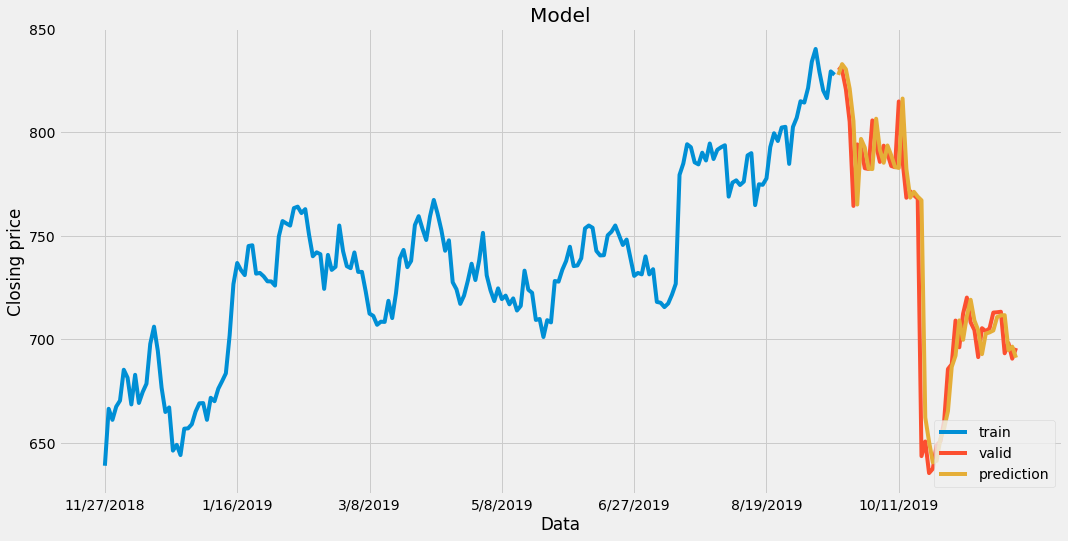

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['train','valid','prediction'],loc='lower right')
plt.xticks(np.arange(0,242,35),df['Date'][0:242:35])
plt.show()


In [ ]:
valid# this the dataframe for actual closing and predicted value
valid['Date']=df['Date'][training_data_len:]
valid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Prediction,Date
194,831.25,827.611938,9/17/2019
195,829.85,832.817993,9/18/2019
196,820.70,830.360474,9/19/2019
197,805.00,820.974976,9/20/2019
198,764.35,805.375122,9/23/2019
199,794.05,765.013306,9/24/2019
200,792.65,796.715942,9/25/2019
201,782.55,792.531006,9/26/2019
202,782.20,782.338135,9/27/2019
203,805.65,782.148315,9/30/2019
